# Comparación de coordenadas

Coordenadas de pyPDF2:

In [1]:
import json
import numpy as np

In [2]:
cord_sol = []
with open('pypdf2/pyPDF2_coords.json', 'r') as fb:
    for i in json.load(fb):
        cord_sol.append(i['/Rect'])
cord_sol = np.array(cord_sol)[:,0:2]
cord_sol

array([[ 89.867, 581.13 ],
       [111.549, 581.13 ],
       [133.232, 581.13 ],
       [154.914, 581.13 ],
       [176.597, 581.13 ],
       [198.28 , 581.13 ],
       [219.962, 581.13 ],
       [241.645, 581.13 ],
       [263.327, 581.13 ],
       [285.01 , 581.13 ],
       [ 89.867, 564.885],
       [111.549, 564.885],
       [133.232, 564.885],
       [154.914, 564.885],
       [176.597, 564.885],
       [198.28 , 564.885],
       [219.962, 564.885],
       [241.645, 564.885],
       [263.327, 564.885],
       [285.01 , 564.885],
       [ 93.245, 498.248],
       [ 93.245, 482.308],
       [ 93.245, 466.368],
       [ 93.245, 450.428]])

Coordenadas de boxdetect (y OpenCV ya que boxdetect utiliza OpenCV)

In [3]:
import json
with open('boxdetect/boxdetect_coords.json', 'r') as fb:
    cord_scan = json.load(fb)
cord_scan = np.array(cord_scan)[:,0:2]
cord_scan

array([[188, 518],
       [232, 518],
       [278, 518],
       [324, 518],
       [368, 518],
       [414, 518],
       [458, 518],
       [504, 518],
       [550, 518],
       [594, 518],
       [188, 552],
       [232, 552],
       [278, 552],
       [324, 552],
       [368, 552],
       [414, 552],
       [458, 552],
       [504, 552],
       [550, 552],
       [594, 552],
       [194, 690],
       [194, 724],
       [194, 756],
       [194, 789]])

## Buscar función de transformación para las coordenadas

Puesto que la transformación parece lineal, supongo una función del estilo:

x_boxdetect = F(x_pyPDF2) = a * x_pyPDF2 + b
y_boxdetect = F(y_pyPDF2) = c * y_pyPDF2 + d


teniendo dos puntos, puedo obtener los valores de a y b / c y d:

y1 = m * x1 + n ; y2 = m * x2 + n >>> m = (y1 - y2) / (x1 -x2) >>> n = y1 - x1 * m

solo puedo comparar diferencias entre puntos distintos, asi que borro los x repetidos de ambos

In [4]:
# get different pypdf coordinates
vx_pypdf, vy_pypdf = [], []
for x, y in cord_sol:
    if not x in vx_pypdf:
        vx_pypdf.append(x)
    if not y in vy_pypdf:
        vy_pypdf.append(y)
# get different boxdetect coordinates
vx_boxdetect, vy_boxdetect = [], []
for x, y in cord_scan:
    if not x in vx_boxdetect:
        vx_boxdetect.append(x)
    if not y in vy_boxdetect:
        vy_boxdetect.append(y)

print(vx_pypdf, '--', vx_pypdf.__len__())
print(vy_pypdf, '--', vy_pypdf.__len__())
print(vx_boxdetect, '--', vx_boxdetect.__len__())
print(vy_boxdetect, '--', vy_boxdetect.__len__())

[89.867, 111.549, 133.232, 154.914, 176.597, 198.28, 219.962, 241.645, 263.327, 285.01, 93.245] -- 11
[581.13, 564.885, 498.248, 482.308, 466.368, 450.428] -- 6
[188, 232, 278, 324, 368, 414, 458, 504, 550, 594, 194] -- 11
[518, 552, 690, 724, 756, 789] -- 6


In [5]:
va, vb = [], []
avg_a, avg_b = 0, 0
count = 0
num_points = vx_pypdf.__len__() - 1
x0_pypdf, x0_boxdetect = 0, 0
for x_pypdf, x_boxdetect in zip(vx_pypdf, vx_boxdetect):
    if count > 0:
        a = (x0_boxdetect - x_boxdetect) / (x0_pypdf - x_pypdf)
        b = x_boxdetect - a * x_pypdf

        va.append(a), vb.append(b)
        avg_a, avg_b = avg_a + a/num_points, avg_b + b/num_points
    else:
        count = 1
        x0_pypdf, x0_boxdetect = x_pypdf, x_boxdetect


In [6]:
vc, vd = [], []
avg_c, avg_d = 0, 0
count = 0
num_points = vy_pypdf.__len__() - 1
y0_pypdf, y0_boxdetect = 0, 0
for y_pypdf, y_boxdetect in zip(vy_pypdf, vy_boxdetect):
    if count > 0:
        c = (y0_boxdetect - y_boxdetect) / (y0_pypdf - y_pypdf)
        d = y_boxdetect - c * y_pypdf

        vc.append(c), vd.append(d)
        avg_c, avg_d = avg_c + c/num_points, avg_d + d/num_points
    else:
        count = 1
        y0_pypdf, y0_boxdetect = y_pypdf, y_boxdetect


In [7]:
print(va)
print('media: ', avg_a)
print(vb)
print('media: ', avg_b)
print(vc)
print('media: ', avg_c)
print(vd)
print('media: ', avg_d)

[2.029333087353565, 2.075406433759945, 2.090795886051625, 2.0754064337599445, 2.084620848053278, 2.075406433759945, 2.081988166928013, 2.0869364695030557, 2.080525563304859, 1.7761989342806395]
media:  2.045661825675487
[5.629923438797164, 1.4894500172950416, 0.106446108198611, 1.4894500172950416, 0.6613782479960264, 1.4894500172950416, 0.8979694026802463, 0.45328029516883817, 1.0294092024821566, 28.378330373001774]
media:  4.162508712020994
[-2.0929516774392116, -2.075239497116382, -2.084556070510615, -2.073857200118506, -2.07341892243424]
media:  -2.0800046735237907
[1734.2770083102491, 1723.983928959243, 1729.398069255834, 1723.1806347048673, 1722.9259383942099]
media:  1726.7531159248806


## Extraer las coordenadas x e y de pyPDF2, boxdetect y boxdetect transformadas

Uyilizando la aproximación obtenida:

x_boxdetect ~ x_esperada = 2.05 * x_pyPDF2 + 4.16

y_boxdetect ~ y_esperada = - 2.08 * y_pyPDF2 + 1726

Voy a dibujar las gráficas para poder ver la diferencia visualmente

In [8]:
x_cord = np.concatenate(
    (np.array([cord_sol[:,0]]).T,
     np.array([cord_scan[:,0]]).T,
     np.array([cord_sol[:,0]]).T * 2.05 + 4.16 - 2), axis=1) # substraigo 1 para ver mejor

y_cord = np.concatenate(
    (np.array([cord_sol[:,1]]).T,
     np.array([cord_scan[:,1]]).T,
     np.array([cord_sol[:,1]]).T * (-2.08) + 1726 - 2), axis=1) # substraigo 5 para ver mejor

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

(0.0, 700.0)

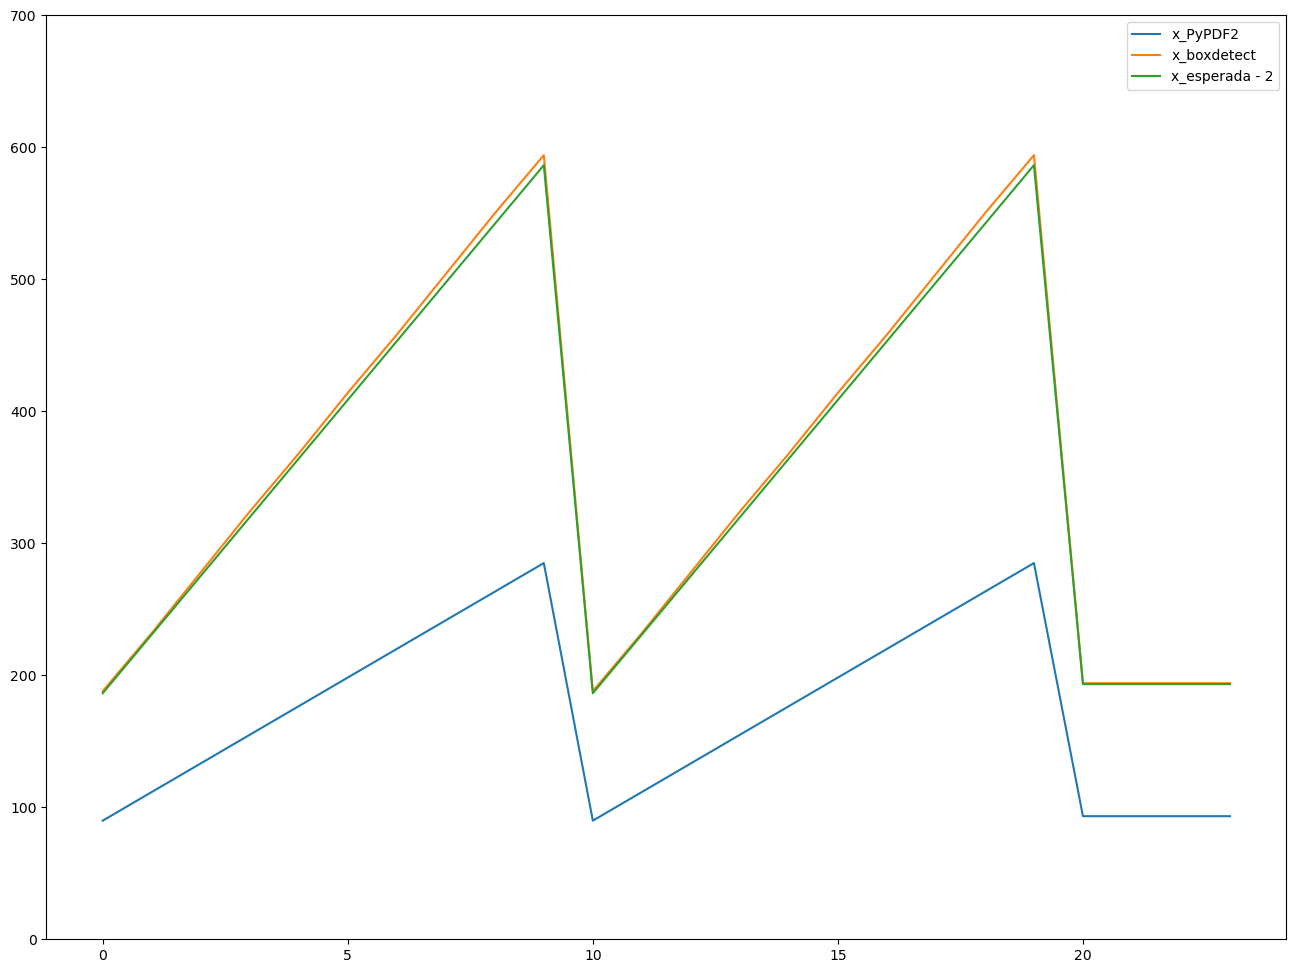

In [10]:
fig, ax = plt.subplots()
dfx = pd.DataFrame(x_cord)
dfx[0] = dfx[0].astype(float)
dfx[1] = dfx[1].astype(float)
dfx.plot(figsize=(16,12), ax=ax)
ax.legend(["x_PyPDF2", "x_boxdetect", "x_esperada - 2"])
ax.set_ylim(0,700)

(400.0, 900.0)

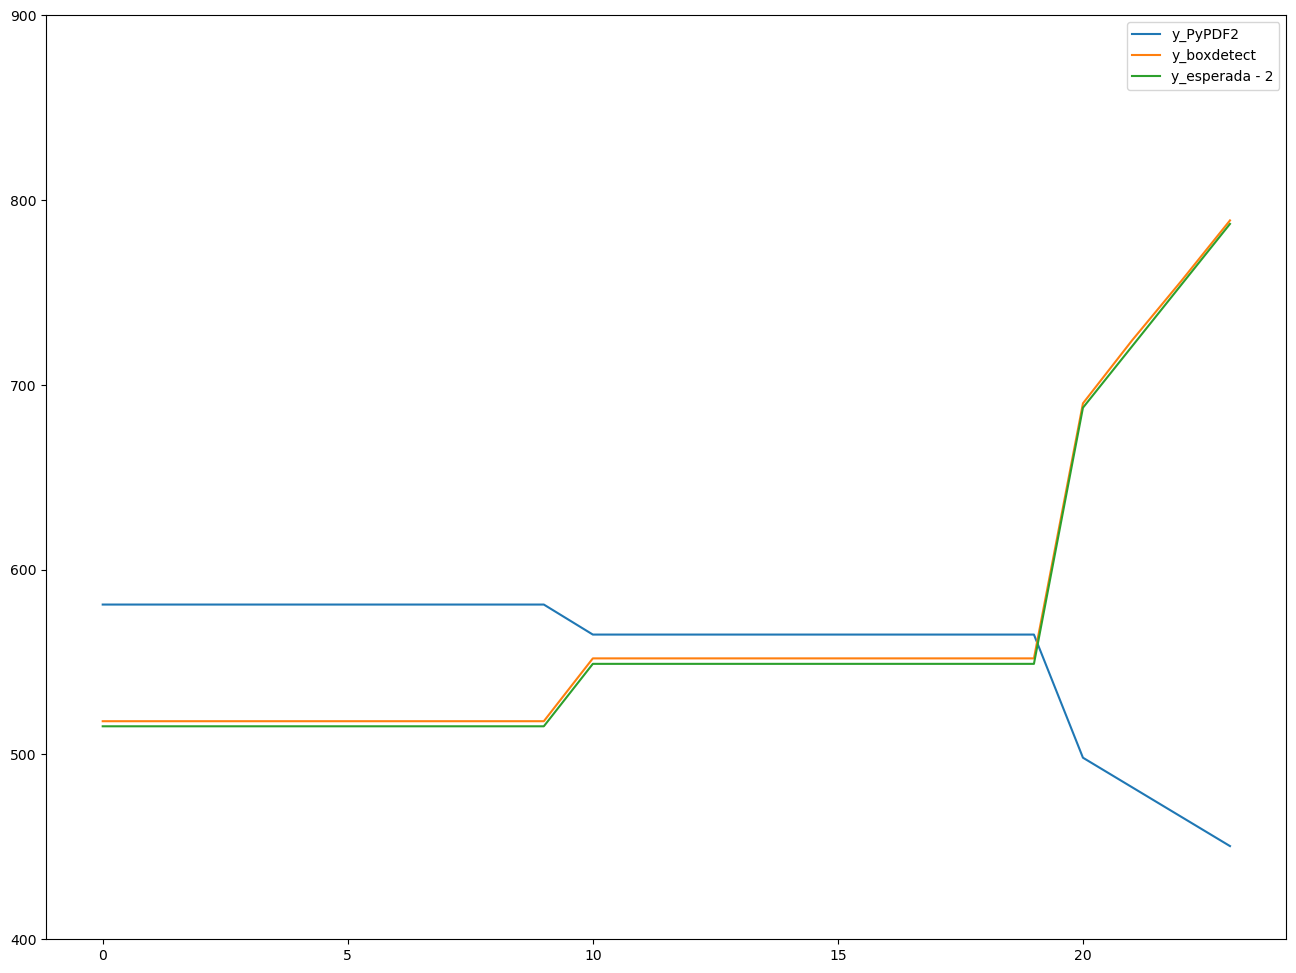

In [11]:
fig, ax = plt.subplots()
dfy = pd.DataFrame(y_cord)
dfy[0] = dfy[0].astype(float)
dfy[1] = dfy[1].astype(float)
dfy.plot(figsize=(16,12), ax=ax)
ax.legend(["y_PyPDF2", "y_boxdetect", "y_esperada - 2"])
ax.set_ylim(400,900)